<a href="https://colab.research.google.com/github/DeepikaIITb/Deepika_Datahack/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
import matplotlib.pyplot as plt

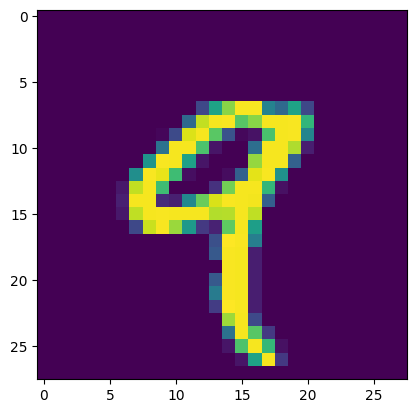

In [11]:
plt.imshow(X_train[4])

In [12]:
# sari values of the array are in 0 to 255values
# hame values ki range 0 to 1 krni h
# kyuki values ki range jitni choti hoti h
# convergence utna hi fast hota h
# divide all the values with 255
X_train=X_train/255
X_test=X_test/255

In [13]:
# neural network architecture

In [18]:
# shape change krna pdega 28x28 se 784x1 krna h
# jiske liye we've a library flatten layer

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # jab bhi 1 se jada nodes in output use softmax

In [19]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam")  # isme labels ko one hot encode ni krna pdega
# agr categorical_crossentropy hota to one hot encoding krna pdta

In [22]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4711 - val_loss: 0.1527
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1381 - val_loss: 0.1122
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0895 - val_loss: 0.0984
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0619 - val_loss: 0.0978
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0484 - val_loss: 0.0887
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0375 - val_loss: 0.0852
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0289 - val_loss: 0.0845
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0225 - val_loss: 0.0884
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0174 - val_loss: 0.0927
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0145 - val_loss: 0.0926


In [24]:
model.predict(X_test)

# 0 ka hone ka probrablity, 1 ka hone ka probability.......9 ka hone.... for each instance

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.58127414e-10, 4.78469532e-13, 7.19818090e-08, ...,
        9.99980271e-01, 1.23505495e-09, 1.61275821e-07],
       [3.98458877e-10, 1.34249819e-06, 9.99998629e-01, ...,
        1.03486780e-15, 2.52310706e-09, 7.63136054e-17],
       [1.06420464e-08, 9.99529660e-01, 9.13459735e-06, ...,
        2.94848316e-04, 1.55294736e-04, 1.99190723e-07],
       ...,
       [9.15532171e-17, 9.22773956e-14, 1.05865200e-13, ...,
        7.45202988e-06, 2.25648666e-10, 6.37756727e-08],
       [1.16467136e-15, 2.05449112e-14, 1.55159681e-16, ...,
        6.91114212e-13, 1.29801194e-07, 1.20677565e-11],
       [1.67833168e-13, 4.13841663e-14, 1.32183359e-12, ...,
        1.19354501e-18, 6.01545181e-13, 6.65138339e-15]], dtype=float32)

In [25]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
y_pred=y_prob.argmax(axis=1)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9774

In [30]:
# adding one more layer

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
history=model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9772 - val_loss: 0.2811
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 0.9765 - val_loss: 0.3002
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9980 - loss: 0.0102 - val_accuracy: 0.9761 - val_loss: 0.2896
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9986 - loss: 0.0066 - val_accuracy: 0.9781 - val_loss: 0.2752
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9991 - loss: 0.0037 - val_accuracy: 0.9766 - val_loss: 0.3098
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.9774 - val_loss: 0.3007
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9988 - loss: 0.0051 - val_accuracy: 0.9777 - val_loss: 0.3005
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9992 - loss: 0.0027 

In [47]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [48]:
accuracy_score(y_test, y_pred)

0.9736

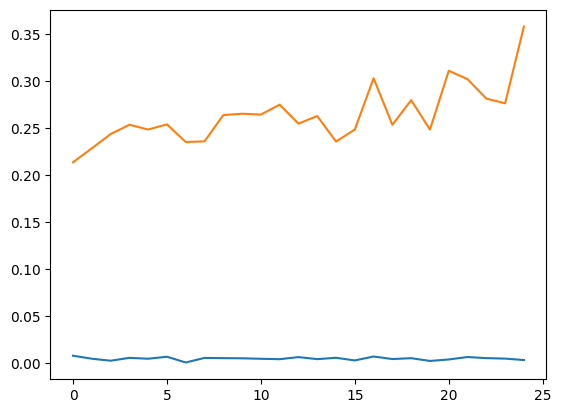

In [49]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [50]:
# day 12 check

KeyError: 'accuracy'